In [3]:
from IPython.display import display,HTML
display(HTML("<style>.container {width:95% !important ; }</style>"))

### 하이퍼 파라미터 튜닝 수행 방법
- Grid Search
- Random Search
- Bayesian Optimization
- 수동 튜닝

### 하이퍼 파라미터 튜닝의 주요 이슈
- Gradient Boosting 기반 알고리즘은 튜닝해야 할 하이퍼 파라미터 개수가 많고 범위가 넓어서 가능한 개별 경우의 수가 너무 많음
    - 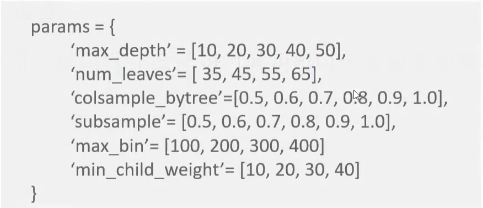
- 이러한 경우의 수가 많을 경우 데이터가 크면 하이퍼 파라미터 튜닝에 굉장히 오랜 시간이 투입되어야 함.

### Grid Search와 Random Search의 주요 이슈
- **GridSearchCV**는 수행 시간이 너무 오래 걸림. 개별 하이퍼 파리머티들을 Grid 형태로 지정하는 것은 한계가 존재(데이터 세트가 작을 때 유리)
- **RandomizedSearch**는 수행 시간은 줄여 주지만, Random한 선택으로 최적 하이퍼 파라미터 검출에 태생적 제약(데이터 세트가 클 때 유리)
- 두 가지 방법 모두 iteration 중에 어느정도 최적화된 하이퍼 파라미터들을 활용하면서 최적화를 수행할 수 없음.(방향성을 가지고 최적화를 하지 못하기 때문에)

### Bayesian 최적화란?
1. Bayesian 최적화 정의
    - 미지의 목적함수(Objective Function)를 학습하여 이를 전역의 최적해로 만드는 파라미터를 찾는 데 사용됨.
    - 확률을 사용하는 전역 최적화 방법으로, 그 중 Bayes 정리를 활용하여 검색을 지시함.
    
2. Bayesian 최적화가 필요한 경우
    - 가능한 **최소의 시도**로 **최적의 답**을 찾아야 할 경우
    - 개별 시도가 너무 **많은 시간/자원**을 필요로 할 때
    
3. Bayesian 최적화의 구성요소
   1. 대체 모델(Surrogate Model)
       - 실제 모델의 대리자 역할(목적 함수에 대한 대략적인 값을 추정해주는 함수)
       - 데이터로부터 추정할 수 없는 하이퍼파라미터 값을 대체 모델에 적용하여 모델의 성능을 평가함
       - 이렇게 얻어진 데이터를 다시 활용하여 최적의 하이퍼파라미터를 찾아감.
   2. 획득 함수(Acquistion Function)
       - predicted 된 평균과 uncertainty를 보여주는 분산값을 기반으로 확률적으로 다음 추정 지점, 즉 최적의 값을 찾기 위해 알아봐야 할 후보를 제안해주는 함수
       
* 자세한 내용 https://domybestinlife.tistory.com/278 참고

### 베이지안 최적화(Bayesian Optimization) 개요
- 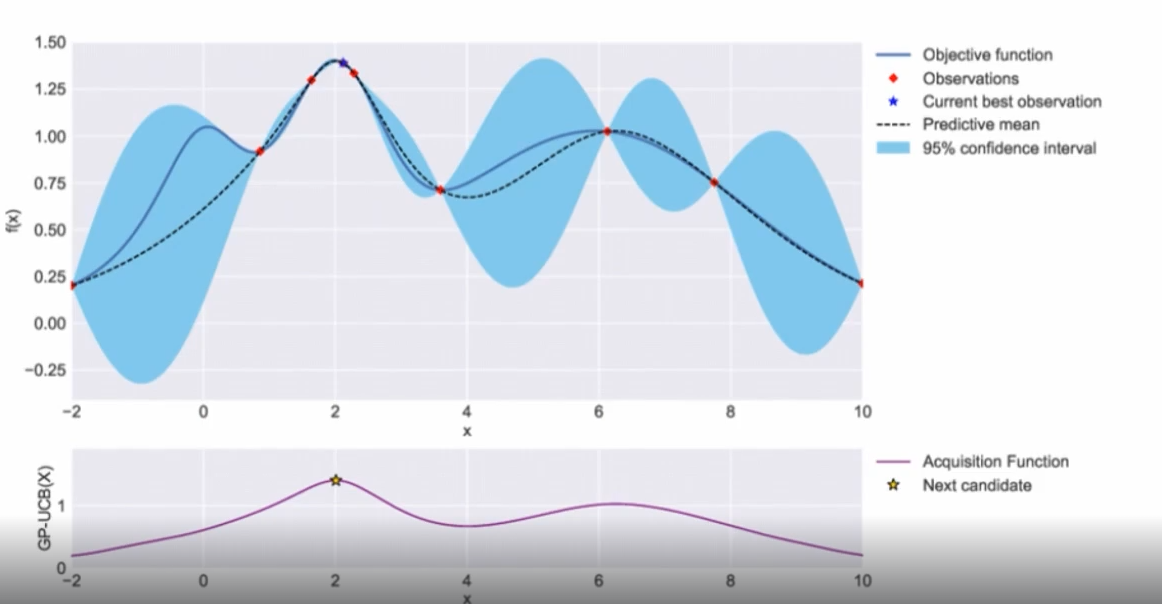
- 베이지안 최적화는 미지의 함수가 반환하는 값의 최소 또는 최대값을 만드는 최적해를 짧은 반복을 통해 찾아내는 최적화 방식.
- 베이지안 최적화는 새로운 데이터를 입력 받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수를 도출
- 대체 모델(Surrogate Model)과 획득 함수로 구성되며, 대체 모델은 획득 함수로 부터 최적 입력 값을 추천 받은 뒤 이를 기반으로 최적 함수 모델을 개선
- 획득 함수는 개선된 대체 모델을 기반으로 다시 최적 입력 값을 계산

### 베이지안 최적화 수행 단계
1. 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하여 성능 결과를 관측
-  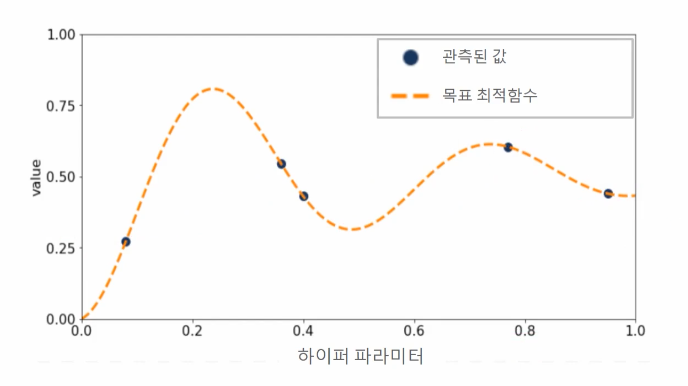
2. 관측된 값을 기반으로 대체 모델(예측 최적함수)은 최적 함수를 예측 추정
- 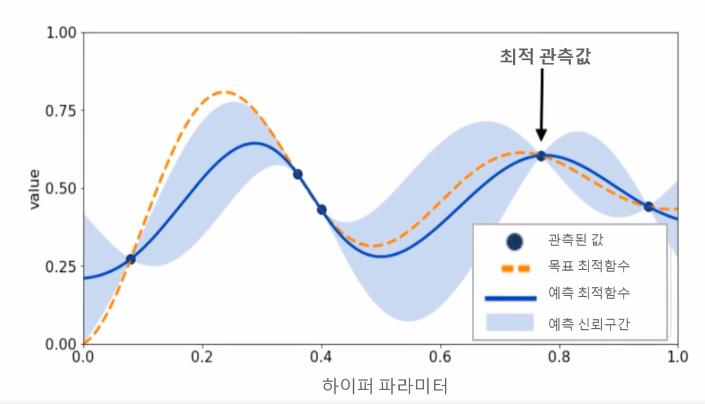
3. 획득 함수에서 다음으로 관측할 하이퍼 파라미터 추출
- 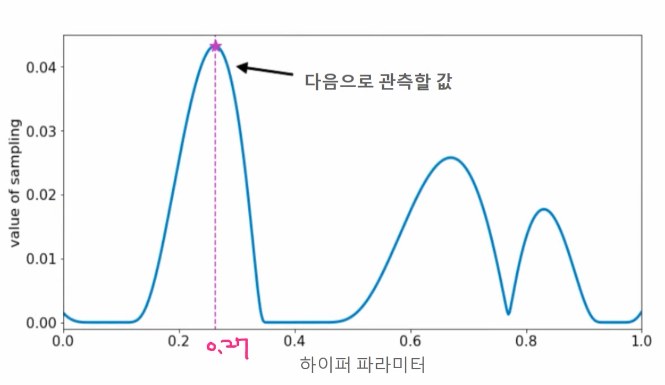
4. 해당 하이퍼 파라미터로 관측된 값을 기반으로 대체 모델은 다시 최적 함수 예측 추정




### 베이지안 최적화 구현 요소
1. 입력 값 범위(Search_space = {"x" : (-10,10), "Y" : (-15,15)})
2. 목적 함수(black box function)

    <code>Python
    def black_box_function(x,y):
            """
            함수 내용
            """
            return -x^2-20*y
    </code>



3. 함수 반환 최대/최소값 유추

    <code>Python
        fmin(fn = black_box_function
            space = search_space,
            max_evals = 20, 
            trials = trial_val
        )
    </code>

### 베이지안 최적화를 구현한 주요 패키지
- HyperOpt
- Baesian optimization
- Optuna

##### 실습

###### HyperOpt의 주요 구성 요소
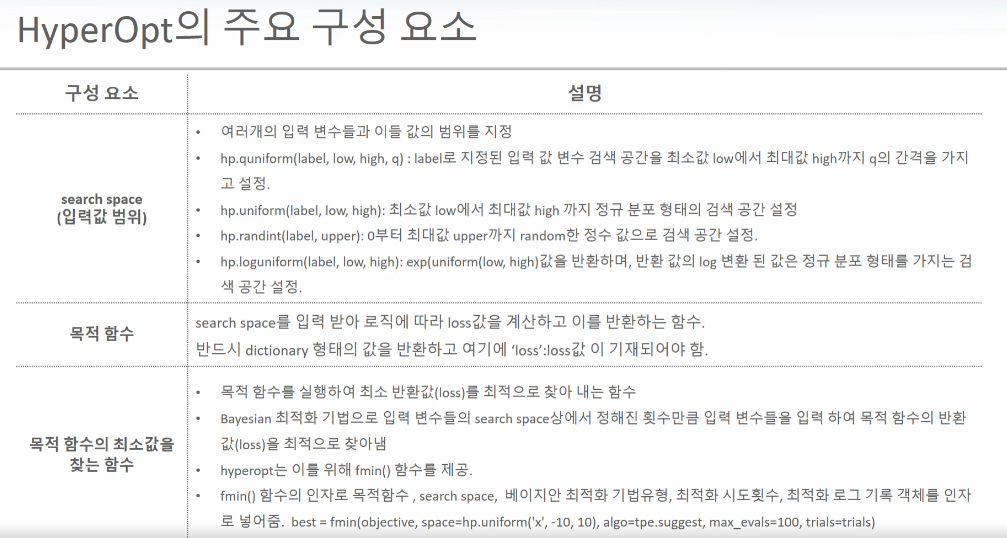

In [2]:
import hyperopt

print(hyperopt.__version__)

0.2.7


In [7]:
# 검색 공간 설정
from hyperopt import hp

search_space = {"x" : hp.quniform("x", -10, 10, 1), "y" : hp.quniform("y", -15, 15, 1)}

In [8]:
# 목적함수(black box)설정
from hyperopt import STATUS_OK

# 목적 함수를 생성. 입력 변수값과 입력 변수 겁색 범위를 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space["x"]
    y = search_space["y"]
    
    # retval은 목적함수가 아닌 loss값을 의미함(목적함수는 아무도 모름)
    retval  = x**2 - 20*y
    
    return retval # return {"loss" : retval ,"status" : STUATS_OK}

In [9]:
# 최솟값 탐색
from hyperopt import fmin, tpe, Trials
import numpy as np

# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_eval = 5)로 찾아냄
# algo 의 경우 하이퍼 파라미터를 탐색하는 방법이다. tpe.suggest는 베이지안 최적화를 사용하여 다음에 시도할 파라미터 값을 추론한다.
    ## 다른 선택지로는 random, anneal.suggest, rand.suggest등이 존재함
best_01 = fmin(fn = objective_func, 
               space = search_space, 
               algo = tpe.suggest, 
               max_evals = 5,
               trials = trial_val, 
               rstate = np.random.default_rng(seed = 0))
print("best : " ,best_01)

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 559.26trial/s, best loss: -224.0]
best :  {'x': -4.0, 'y': 12.0}


In [10]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 462.71trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [11]:
trial_val

- HyperOpt 수행 시 적용된 입력 값들과 목적 함수 반환값 보기

In [12]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 지정됨
# 리스트 내부의 개별 원소는 {'loss' : 함수 반환값, 'status' : 반환상태값}과 같은 딕셔너리 형태임
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [13]:
### Trials 객체의 valas 속성에 {"입력변수명" : 개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [14]:
import pandas as pd

# results에서 loss 키 값에 해당하는 밸류들을 추출하여 list로 생성
losses = [loss_dict["loss"] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({"x" : trial_val.vals["x"],
                         "y" : trial_val.vals["y"],
                         "losses" : losses})

result_df.head(5)

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0


### HyperOpt를 이용한 XGBoost 하이퍼파라미터 튜닝

In [15]:
# 데이터 불러오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 학습 데이터를 다시 학습과 검증 데이터로 분리 
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.1, random_state=156 )

In [20]:
# 검색 공간(search_space)의 설정

from hyperopt import hp

# hp.quniform(parameter, start, end, interval)
# hp.uniform의 경우 정규 분포된 값으로 검색한다.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
               }

In [18]:
# 목적함수(loss) 설정
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space값으로 입력된 모든 값은 실수형임. 
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함. 
# 정확도는 높은 수록 더 좋은 수치임. -1* 정확도를 곱해서 큰 정확도 값일 수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'], 
                            eval_metric='logloss')
    
    # 목적함수로 cv 사용
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
        
    # accuracy는 cv=3 개수만큼의 정확도 결과를 가지므로 이를 평균해서 반환하되 -1을 곱해줌. 
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [21]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,  
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))  # rstate의 경우 seed를 고정하지 않을 때 성능이 훨씬 좋음
print('best:', best)

100%|███████████████████████████████████████████████| 50/50 [00:14<00:00,  3.46trial/s, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.684441779397407, 'learning_rate': 0.1475201153968472, 'max_depth': 9.0, 'min_child_weight': 2.0}


In [22]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
                        round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
                        int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.68444, learning_rate:0.14752, max_depth:9, min_child_weight:2


###### 결과 확인

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=round(best['learning_rate'], 5), 
                            max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', 
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.55271	validation_1-logloss:0.58669
[1]	validation_0-logloss:0.46532	validation_1-logloss:0.52479
[2]	validation_0-logloss:0.39616	validation_1-logloss:0.46923
[3]	validation_0-logloss:0.34165	validation_1-logloss:0.42858
[4]	validation_0-logloss:0.29745	validation_1-logloss:0.39483
[5]	validation_0-logloss:0.25934	validation_1-logloss:0.36657
[6]	validation_0-logloss:0.22862	validation_1-logloss:0.35072
[7]	validation_0-logloss:0.20367	validation_1-logloss:0.33159
[8]	validation_0-logloss:0.18239	validation_1-logloss:0.32347
[9]	validation_0-logloss:0.16291	validation_1-logloss:0.30890
[10]	validation_0-logloss:0.14780	validation_1-logloss:0.30568
[11]	validation_0-logloss:0.13390	validation_1-logloss:0.29906
[12]	validation_0-logloss:0.12276	validation_1-logloss:0.28876
[13]	validation_0-logloss:0.11289	validation_1-logloss:0.28343
[14]	validation_0-logloss:0.10346	validation_1-logloss:0.27987
[15]	validation_0-logloss:0.09554	validation_1-logloss:0.27622
[1

In [26]:
losses = [loss_dict['loss'] for loss_dict in trial_val.results]
result_df = pd.DataFrame({'max_depth': trial_val.vals['max_depth'],
                          'min_child_weight': trial_val.vals['min_child_weight'],
                          'colsample_bytree': trial_val.vals['colsample_bytree'],
                          'learning_rate': trial_val.vals['learning_rate'],
                          'losses': losses
                         }
                        )
result_df.head(5)

,max_depth,min_child_weight,colsample_bytree,learning_rate,losses
0,19.0,2.0,0.585235,0.033688,-0.949503
1,5.0,2.0,0.727186,0.105956,-0.962676
2,6.0,2.0,0.959945,0.154804,-0.958261
3,6.0,2.0,0.950012,0.120686,-0.956068
4,16.0,2.0,0.674336,0.142392,-0.960454
